## Machine Learning Iris Flower Data Set Project

***

Author: Emma Dunleavy

Student Number: g00425660

Module Machine Learning & Statictics Winter 2023/24 

Lecturer: Ian McLoughlin
***


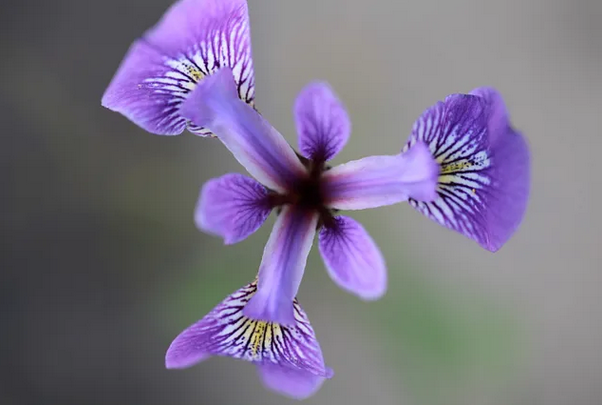


### Required Libraries

In [2]:
# Graphs.
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

import sklearn as sk
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.preprocessing as pre


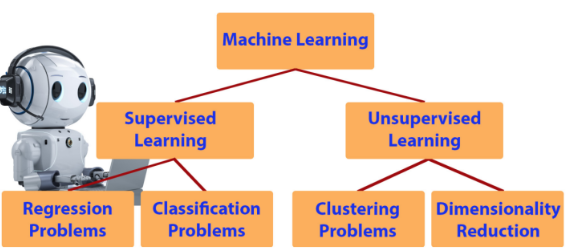

https://www.google.ie/books/edition/Mastering_Classification_Algorithms_for/EEfCEAAAQBAJ?hl=en&gbpv=1&dq=classification+algorithms&printsec=frontcover


## Supervised Learning

According to [Taeho Jo](https://www.google.ie/books/edition/Machine_Learning_Foundations/0egdEAAAQBAJ?hl=en&gbpv=1&dq=supervised+learning&printsec=frontcover) "<i> machine learning is defined as the computation paradigm where the capacity for solving the given problem is built by previous examples...supervised learning is the learning paradigm where the parameters are optimized for minimizing the difference between the target output and the computed output.</i>"

Put more simply, input data is used to train a model and develop output labels which in turn are used to predict the classification of future data points. Providing existing knowledge allows the machine find patterns which are used to answer future questions asked about data in the same category. There are several steps and datasets required to delveop an unbiased model and it is important to ensure the datasets are kept seperate from each another.

The first dataset used is the "training dataset" which is the data used to fit the model. A "validation dataset" is held back from the training set and used to used to provide an unbiased evaluation of how well the model is performing, however once incoproated into the model the evaluation becomes more biased. The final dataset required is the "test dataset" which is used to provide an unbiased evaluation of a final model fit on the training dataset.

The figure below taken from ["Machine Learning Foundations"](https://www.google.ie/books/edition/Machine_Learning_Foundations/0egdEAAAQBAJ?hl=en&gbpv=1&dq=supervised+learning&printsec=frontcover) illustrates the flow of how a classification model is refined.

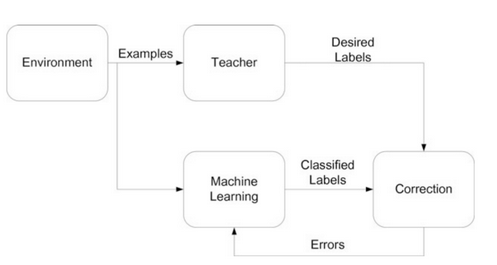




***

## Classification Algorithms


Classification algorithms use training data to predict the likelihood that subsequent data will fall into one of the predetermined categories. There are four different types of classification;

- Binary Classification
- Multi-Class Classification
- Multi-Label Classification
- Imbalanced Classification

Some of the commonly used binary classification algorithms are:

    K-Nearest Neighbours
    Naive Bayes
    Decision Trees
    Support Vector Machines
    Logistic Regression

This notebook will demonstrate the `~sklearn.neighbors.KNeighborsClassifier`, `Decision Trees`, `~sklearn.StandardScaler` and the `~sklearn.linear_model.LogisticRegression` using the famous Iris Dataset to express the outputs. Let's first take a look at the dataset.


### Ronald A Fisher's Iris Dataset

In [361]:
# Load iris data.
df = pd.read_csv('data/iris.csv')

In [362]:
# Show.
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


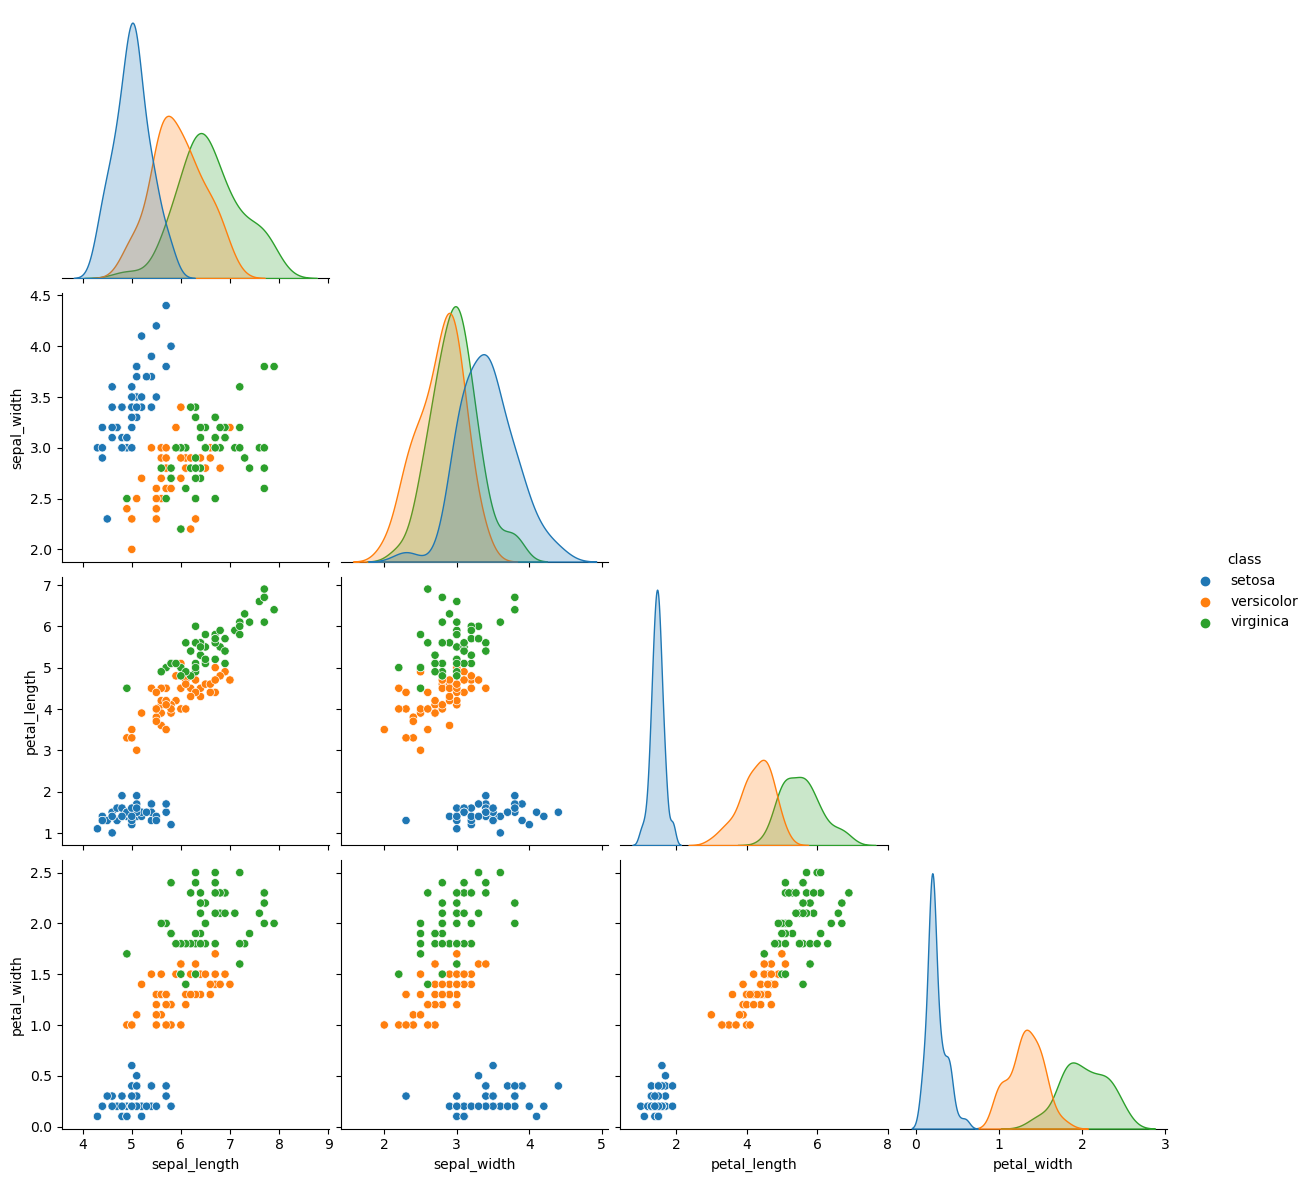

In [401]:
sns.pairplot(data=df, hue="class", corner=True, height=3)


### k-Nearest Neighbors

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. It is commonly used in handwriting detection, image recognition, and video recognition. For quantitative data the $\text {Euclidean Distance}$ is used. Other distance metrics include $\text {Taxicab Geometry, Minkowski Distance, Jaccard Index}$ and $\text  {Hamming Distance}$.

$$ \text {Euclidean Distance} = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$$

Where:

- $ n  : \text{Number of dimensions}$

- $ x_i : \text{Coordinate of point } x \text{ in dimension } i $

- $ y_i : \text{Coordinate of point } y \text{ in dimension } i $



In [364]:
# The X values.
#X = df[['petal_length', 'petal_width']]
X = df.iloc[:, 2:-1]

# Show.
X

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [365]:
# Turn X into a numpy array.
#X.to_numpy()

In [366]:
# y values.
y = df['class']

# Show.
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object

In [367]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# Fit the data.
clf.fit(X, y)

KNeighborsClassifier()

In [368]:
# The first row of X.
X.iloc[0]

petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

In [369]:
# Quick check that the classifier correctly predicts first X sample.
clf.predict(X.iloc[:1])

array(['setosa'], dtype=object)

In [370]:
y.iloc[0]

'setosa'

In [371]:
# Keep some samples back for testing, train on the others.
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y)

In [372]:
X_train

,petal_length,petal_width
40,1.3,0.3
139,5.4,2.1
35,1.2,0.2
73,4.7,1.2
65,4.4,1.4
...,...,...
95,4.2,1.2
136,5.6,2.4
75,4.4,1.4
69,3.9,1.1


In [373]:
y_train

40         setosa
139     virginica
35         setosa
73     versicolor
65     versicolor
          ...    
95     versicolor
136     virginica
75     versicolor
69     versicolor
122     virginica
Name: class, Length: 112, dtype: object

In [374]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier(n_neighbors=5)

# Fit the data.
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [375]:
# Predict based on test set.
clf.predict(X_test)

array(['virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'setosa', 'versicolor'], dtype=object)

In [376]:
# Proportion of correct classifications on test set.
(clf.predict(X_test) == y_test).sum() / X_test.shape[0]

0.9736842105263158

#### Cross Validation

In [377]:
# Run cross-validation with five folds.
sk.model_selection.cross_val_score(clf, X, y)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [378]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 12  0]
 [ 0  1 14]]


In [379]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



In [380]:
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
)

### kNN Visualisation 

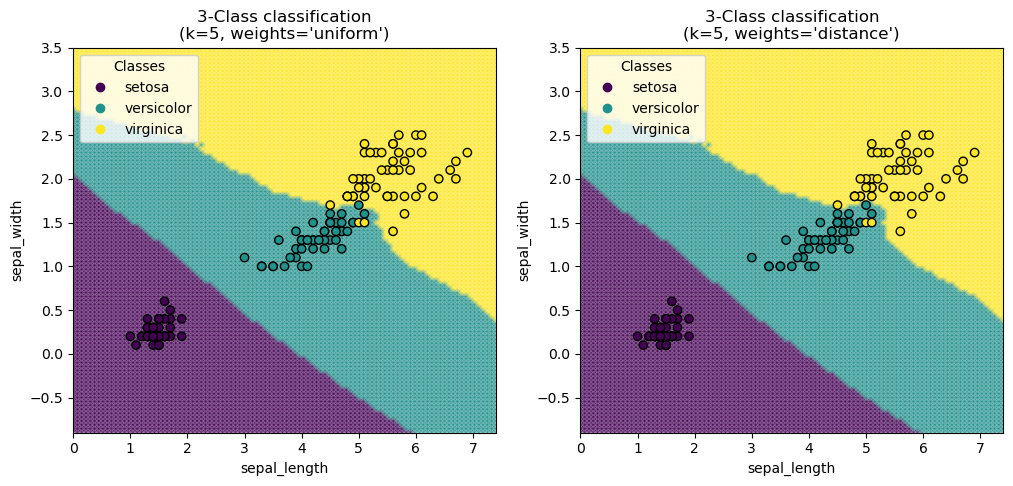

In [381]:
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    
    # Convert the 'class' column to numeric labels
    label_encoder = LabelEncoder()
    y_numeric = label_encoder.fit_transform(df['class'])
    
    # Select only the first two features for visualization
    X_test_subset = X_test.iloc[:, :2]
    
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test_subset,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel='sepal_length',
        ylabel='sepal_width',
        shading="gouraud",
        alpha=0.5,
        ax=ax,
    )
    
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_numeric, edgecolors="k")
    
    # Legend.
    disp.ax_.legend(scatter.legend_elements()[0], df['class'].unique(), loc="upper left", title="Classes")
    
    # Title.
    _ = disp.ax_.set_title(f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})")

plt.show()


#### k Value Error Rate

In [382]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y) #test_size=0.20

In [384]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [385]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [386]:
y_pred = classifier.predict(X_test)

In [387]:
print(confusion_matrix(y_test, y_pred))

[[17  0  0]
 [ 0 11  0]
 [ 0  1  9]]


In [388]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [389]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

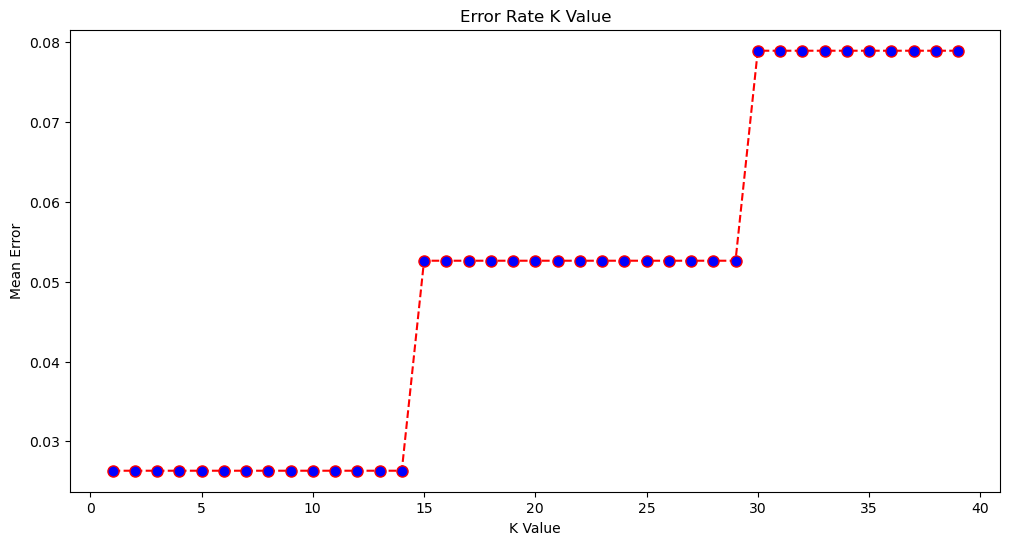

In [390]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Decision Tree Classifier

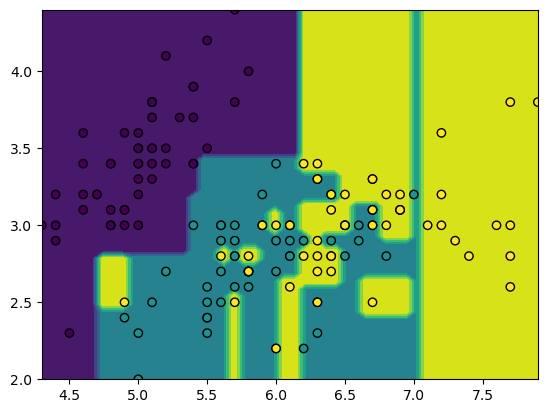

In [391]:
iris = load_iris()
feature_1, feature_2 = np.meshgrid(
np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),
np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
tree = DecisionTreeClassifier().fit(iris.data[:, :2], iris.target)
y_pred = np.reshape(tree.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()

display.ax_.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, edgecolor="black")


***
## Logistic Regression in Machine Learning

Logistic regression is classification algorithm based on probabilty, that uses predictive analysis to classify observations of discrete data. An example of it's everyday use include determining if an email is spam or not spam or if a tumor is malignant or benign.

Let's generate some random data to create a graph of the Logistic Regression Curve detailing the decision boundry.

In [ ]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = (X > 5).astype(int)

In [ ]:
# Reshape y to a 1-dimensional array
y = y.ravel()

In [ ]:
# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

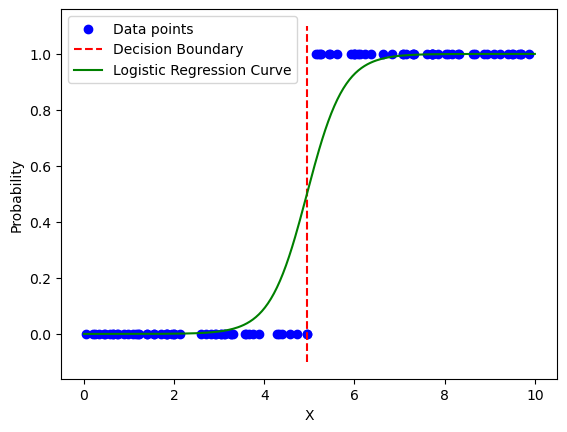

In [407]:
# Plot the data points
plt.scatter(X, y, color='blue', marker='o', label='Data points')

# Plot the decision boundary
X_test = np.linspace(0, 10, 300).reshape(-1, 1)
y_proba = model.predict_proba(X_test)[:, 1]
decision_boundary = X_test[y_proba >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [-0.1, 1.1], color='red', linestyle='--', label='Decision Boundary')

# Plot the logistic regression curve
plt.plot(X_test, y_proba, color='green', label='Logistic Regression Curve')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()


The image below show how Linear Regression and Logistic Regression differ. Linear regression predicts a continuous output and logistic regression predicts the probability of an example belonging to a particular category.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg?raw=true)

*Image source: [towardsdatascience.com](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148)*

### Sigmoid Function

$\large \sigma(z) = \frac{1}{1 + e^{-z}}$

### Logistic Regression Formula

$ \large  P(Y=1) = \LARGE  \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}$

Where:

- $P(Y=1)$ is the probability of the dependent variable $YY$ being $1$.

- $ee$ is the base of the natural logarithm.

- $β0,β1,β2,…,βnβ0​,β1​,β2​,…,βn$​ are the coefficients of the model.

- $x1,x2,…,xnx1​,x2​,…,xn$​ are the independent variables.

In [392]:
# Show.
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [393]:
X=df.iloc[:,0:4]
Y=df["class"]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [394]:
# Keep some samples back for testing, train on the others.
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y)

In [395]:
# Show.
X_train.shape

(112, 4)

In [3]:
# Create a standard scaler.
scaler = pre.StandardScaler()

# Show.
scaler

StandardScaler()

In [397]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [398]:
# Apply scaling on training data.
pipe.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [399]:
# Apply scaling on testing data, without leaking training data.
pipe.score(X_test, y_test)  

0.9210526315789473

https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

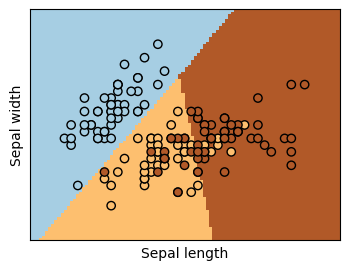

In [402]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

#### References

archive.ics.uci.edu. (n.d.). UCI Machine Learning Repository. [online] Available at: https://archive.ics.uci.edu/dataset/53/iris.

Jo, T. (2021). Machine Learning Foundations: Supervised, Unsupervised, and Advanced Learning. [online] Google Books. Springer Nature. Available at: https://www.google.ie/books/edition/Machine_Learning_Foundations/0egdEAAAQBAJ?hl=en&gbpv=1&dq=supervised+learning&printsec=frontcover [Accessed 31 Dec. 2023].

Majumdar, P. (2023). Mastering Classification Algorithms for Machine Learning: Learn how to apply Classification algorithms for effective Machine Learning solutions (English Edition). [online] Google Books. BPB Publications. Available at: https://www.google.ie/books/edition/Mastering_Classification_Algorithms_for/EEfCEAAAQBAJ?hl=en&gbpv=1&dq=classification+algorithms&printsec=frontcover [Accessed 31 Dec. 2023].

Wolff, R. (2020). Classification Algorithms in Machine Learning: How They Work. [online] MonkeyLearn Blog. Available at: https://monkeylearn.com/blog/classification-algorithms/.

ProjectPro. (n.d.). 7 Types of Classification Algorithms in Machine Learning. [online] Available at: https://www.projectpro.io/article/7-types-of-classification-algorithms-in-machine-learning/435#toc-1.

Hachcham, A. (2022). The KNN Algorithm - Explanation, Opportunities, Limitations. [online] neptune.ai. Available at: https://neptune.ai/blog/knn-algorithm-explanation-opportunities-limitations#:~:text=It%27s%20used%20in%20many%20different [Accessed 2 Jan. 2024].

https://www.facebook.com/jason.brownlee.39 (2017). What is the Difference Between Test and Validation Datasets? [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/difference-test-validation-datasets/.

IBM (2023). What is the k-nearest neighbors algorithm? | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/knn.

‌scikit-learn (2019). scikit-learn: machine learning in Python. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/.

Scikit-learn.org. (2019). 1.6. Nearest Neighbors — scikit-learn 0.21.3 documentation. [online] Available at: https://scikit-learn.org/stable/modules/neighbors.html.

‌GitHub. (n.d.). scikit-learn-classifiers/sklearn-classifiers-tutorial.ipynb at master · mmmayo13/scikit-learn-classifiers. [online] Available at: https://github.com/mmmayo13/scikit-learn-classifiers/blob/master/sklearn-classifiers-tutorial.ipynb [Accessed 1 Jan. 2024].

Lotts, J. (2023). Machine Learning: Application of K Nearest Neighbor Algorithm using Python. [online] copyprogramming.com. Available at: https://copyprogramming.com/howto/python-k-nearest-neighbor-algorithm-in-machine-learning [Accessed 2 Jan. 2024].

‌‌kaggle.com. (n.d.). Logistic Regression From Scratch Iris Data-set. [online] Available at: https://www.kaggle.com/code/rahulrajpandey31/logistic-regression-from-scratch-iris-data-set [Accessed 1 Jan. 2024].

Pant, A. (2019). Introduction to Logistic Regression. [online] Medium. Available at: https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148.

scikit-learn. (n.d.). Logistic Regression 3-class Classifier. [online] Available at: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html.

‌


In [412]:
import sys

# Display the version of a specific package
print("NumPy version:", sys.modules['numpy'].__version__)
print("Matplotlib version:", sys.modules['matplotlib'].__version__)
print("Sklearn version:", sys.modules['sklearn'].__version__)
print("Seaborn version:", sys.modules['seaborn'].__version__)
print("Pandas version:", sys.modules['pandas'].__version__)

NumPy version: 1.23.5
Matplotlib version: 3.7.0
Sklearn version: 1.2.1
Seaborn version: 0.12.2
Pandas version: 1.5.3


***
## End